In [1]:
# dependencies for file reading
import json
import sys
import itertools
import numpy as np
import os
from scipy import signal
import matplotlib.pyplot as plt
from IPython.display import Audio, display
import soundfile as sf
import importlib

import librosa # conda install -c conda-forge librosa
import seaborn as sns

#Synth Interface (SI)
from genericsynth import synthInterface as SI # the base model for all synths, also some utilities 

### Demo of DSSynth interface for creating and exploring Textures
An interactive visualizer is to explore sound models and create textures. It is mostly for understanding the synthesizer, and exploring parameters that you might help you decide how you want to specify them in your config file.

## 1. Load soundModels

In [2]:
soundModels = {}
def loadSoundModels():
    dirpath = "soundModels/"
    modules = [f for f in os.listdir(os.path.dirname(dirpath)) if f[0] != "." and f[0] != "_"]
    for module in modules:
        spec = importlib.util.spec_from_file_location(module, os.path.join(dirpath,module +"/my" + module + "PatternSynth.py"))
        mod = importlib.util.module_from_spec(spec)
        spec.loader.exec_module(mod)
        soundModels[module] = mod
loadSoundModels()
soundModels

{'Drip': <module 'Drip' from 'soundModels/Drip/myDripPatternSynth.py'>,
 'Pop': <module 'Pop' from 'soundModels/Pop/myPopPatternSynth.py'>}

## 2. Explore individual sounds

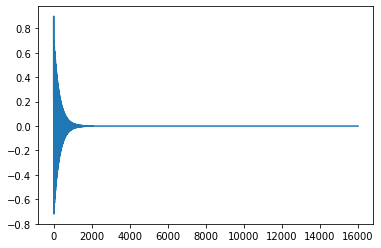

In [3]:
# Load synth model using the synth name or a variable 
synthname = "Pop"
myPop = soundModels["Pop"].MySoundModel
foosynth=myPop(880, 50)

def genAndPlot(n):
    sig=foosynth.generate(n)  #1 second
    plt.plot(sig)
    display(Audio(sig, rate=16000, autoplay=True))

genAndPlot(1)

#### Get sound parameters

In [4]:
# A handy function to print the names and range of parameters using Synth
foosynth.printParams()

Name:  cf  Default value :  880  Max value  2000  Min value  100
Name:  Q  Default value :  50  Max value  50  Min value  0.1


In [5]:
# Get individual parameters
foosynth.getParam('Q') # Get a param value. 

50

#### Set sound parameters (natural ranges)

now the value of synth param f0 is 45


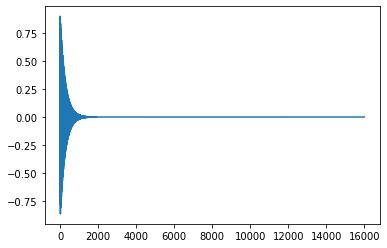

In [6]:
foosynth.setParam('Q', 45) # Can set any synth parameter with setParam()
print("now the value of synth param f0 is {}".format(foosynth.getParam('Q')))    # Get a param value. 
genAndPlot(1)

#### Set synth parameters (Normalized ranges)

now the value of synth param f0 is 100


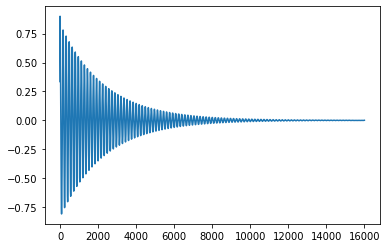

In [7]:
foosynth.setParamNorm('cf', 0)   #setParamNorm uses [0,1] range 
print("now the value of synth param f0 is {}".format(   foosynth.getParam('cf')    ))
genAndPlot(1)

#### Find min and max range of parameters exposed by the synth

In [8]:
fmin = foosynth.getParam('cf', "min")  # by default, getParam would get val, but here we ask for its min
print("min val of synth param f0 is {}".format(fmin))

fmax = foosynth.getParam('cf', "max")  # by default, getParam would get val, but here we ask for its min
print("min val of synth param f0 is {}".format(fmax))

min val of synth param f0 is 100
min val of synth param f0 is 2000


### END OF SECTION 2: Here are some FUN_Experiments for new DSSYNTH Designers
- Set in Normalized range and find natural unit values
- Set in Normalized range and find natural unit values
- Set more than 1 sound parameter and find the change to the sounds
#### HINT: Always use genAndPlot() to hear how it sounds

## 3. Generate textures using synth interface and PatternSynth

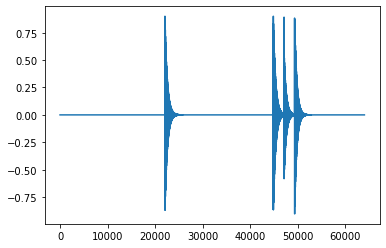

In [9]:
synthname = "Pop"
myPopPatternSynth = soundModels["Pop"].PatternSynth

barsynth=myPopPatternSynth()

def genTexture(n):
    barsig=barsynth.generate(n)      #generates 4 seconds of drip sound
    plt.plot(barsig)
    display(Audio(barsig, rate=16000, autoplay=True))
    
genTexture(4)

### Change parameters (Natural ranges) to generate new textures

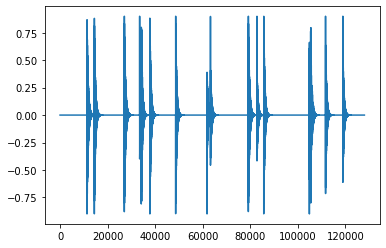

In [10]:
barsynth.setParam("rate",1) # will make 2^1 events per second
barsynth.setParam("irreg", 1)
barsynth.setParam("cf", 440)
genTexture(8)

### Change parameters (Normalized ranges) to generate new textures

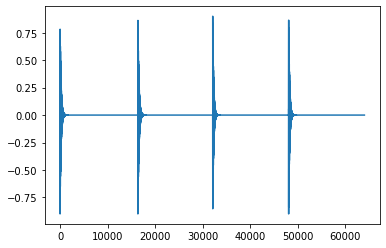

In [11]:
barsynth.setParamNorm("rate",0.5) # will make 2^1 events per second
barsynth.setParamNorm("irreg", 0.0)
barsynth.setParamNorm("cf", 0.5)
genTexture(4)

### END OF SECTION 3

## 4. ADVANCED Texture generation: 

### Visualize distribution of events
Notice that this code is model-independent (uses only SI utility function, no synth methods)

number of events is 8000


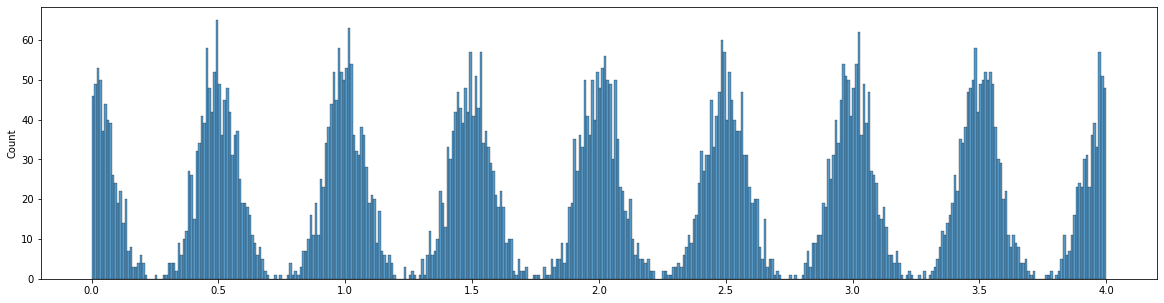

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

events=[]
for i in range(1000) :  #repeat to get enought samples to see the shape of the distribution
                                        #params: (events per second = 2^p1,     sd = .1*p2*10^p2,     seconds)
    events.extend(SI.noisySpacingTimeList(1, .5, 4))
print("number of events is {}".format(len(events)))
plt.figure(figsize=(20,5))
sns.histplot(events, bins=400)
plt.show()

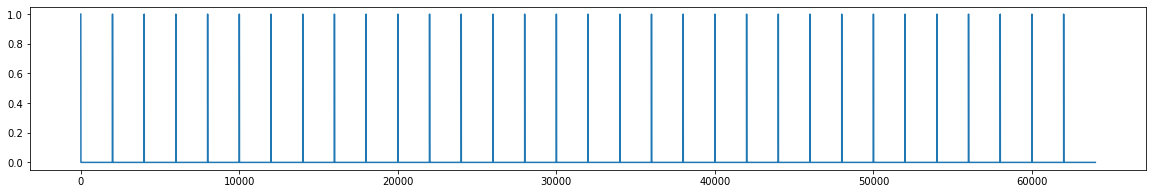

In [17]:
#params: (events per second = 2^p1,     sd = .1*p2*10^p2,     seconds=p3)
elist = SI.noisySpacingTimeList(3, 0, 4)
esig = SI.timeList2Sig(elist,16000,4)

plt.figure(figsize=(20,3))
plt.plot(esig)

## END OF SECTION 4